<a href="https://colab.research.google.com/gist/snsamarasekara/f56015b711aba798b523eded539fb878/nlp-sentiment-analysis-project-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment analysis (NLP) with neural network models. 

Import data:

In [2]:
import pandas as pd

In [3]:
!pip install fastbook
import fastbook


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 31.2 MB/s 
     |████████████████████████████████| 1.2 MB 28.3 MB/s 
     |████████████████████████████████| 346 kB 66.0 MB/s 
     |████████████████████████████████| 197 kB 75.7 MB/s 
     |████████████████████████████████| 4.2 MB 56.3 MB/s 
     |████████████████████████████████| 60 kB 7.5 MB/s 
     |████████████████████████████████| 1.1 MB 6.6 MB/s 
     |████████████████████████████████| 86 kB 5.9 MB/s 
     |████████████████████████████████| 212 kB 68.4 MB/s 
     |████████████████████████████████| 140 kB 71.8 MB/s 
     |████████████████████████████████| 86 kB 7.7 MB/s 
     |████████████████████████████████| 596 kB 64.7 MB/s 
     |████████████████████████████████| 127 kB 73.4 MB/s 
     |████████████████████████████████| 271 kB 68.5 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
     |████████████████████████████████| 

In [4]:
fastbook.setup_book()

Mounted at /content/gdrive


In [5]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [6]:
! kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 35% 9.00M/25.7M [00:00<00:01, 12.8MB/s]
100% 25.7M/25.7M [00:00<00:00, 31.8MB/s]


In [7]:
import zipfile
zf = "/content/imdb-dataset-of-50k-movie-reviews.zip"
target_dir = "/content/data"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [9]:
df = pd.read_csv('/content/data/IMDB Dataset.csv') # creating pandas dataframe with data

In [10]:
df.head(5) # check the first 5 data

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses main...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his ...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've ...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with so...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of conta...",positive


Data preprocessing:

In [11]:
new_df = df[df['sentiment']!='neutral'] # remove neutral sentiments


In [14]:
new_df["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [15]:
sentiment_label = new_df.sentiment.factorize() #convert categorical values to numerical using factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [17]:
new_review = new_df.review.values # retrieve the test data

In [19]:
pip install pandas matplotlib tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer # tokenize the reviews
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(new_review) # creates and association between the words and assigned numbers

In [26]:
encoded_review = tokenizer.texts_to_sequences(new_review) #replace words with the assigned numbers

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_review = pad_sequences(encoded_review, maxlen=200) #make the texts equal length

Building the classifier:
1. Using LSTM:

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [31]:
vocab_size=1000
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           32000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 48,651
Trainable params: 48,651
Non-trainable params: 0
__________________________________________________

Train the model:

In [32]:
history = model.fit(padded_review,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
1250/1250 [==============================] - 476s 376ms/step - loss: 0.5023 - accuracy: 0.7458 - val_loss: 0.4433 - val_accuracy: 0.8295
Epoch 2/5
1250/1250 [==============================] - 461s 369ms/step - loss: 0.3727 - accuracy: 0.8399 - val_loss: 0.3449 - val_accuracy: 0.8549
Epoch 3/5
1250/1250 [==============================] - 460s 368ms/step - loss: 0.3542 - accuracy: 0.8490 - val_loss: 0.3309 - val_accuracy: 0.8621
Epoch 4/5
1250/1250 [==============================] - 460s 368ms/step - loss: 0.3436 - accuracy: 0.8556 - val_loss: 0.3415 - val_accuracy: 0.8453
Epoch 5/5
1250/1250 [==============================] - 500s 400ms/step - loss: 0.3387 - accuracy: 0.8567 - val_loss: 0.3219 - val_accuracy: 0.8623


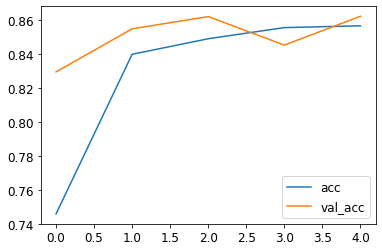

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

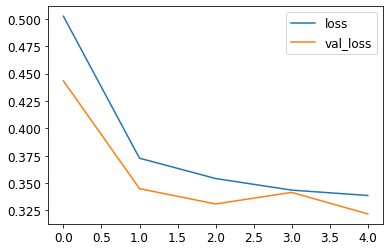

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

Test the model:

In [40]:
def predict_sentiment(review):
    tw = tokenizer.texts_to_sequences([review])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])
test_sentence1 = "The service was great"
predict_sentiment(test_sentence1)
test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label:  positive
Predicted label:  negative


The accuracy of above model was around 85% and the predictions for test data was ok. Some of the positive reveiws with weaker words such as "it was an ok movie" was predicted as negative. Therefore the model needs developmet. 

To avoid the above mentioned problem deep learning models such as ResNet50 and inception nets are developed in future projects. 